# Homework 8
## ECE204 Data Science & Engineering

*Note: this notebook contains some example code. Unless explicitly mentioned, do not change this code.*

*Warning: this notebook reuses certain variable names, which can cause conflict. They're found in multiple questions. If you have any difficulty, please restart your kernel in the menu above.*

# Multiple Regression

The following few questions deal with the Energy Efficiency dataset `energy_data.csv`. In particular, the questions deal with using Multiple Regression for predicting the reponse given a certain set of features. <br>

The dataset contains 8 features/attributes. Specifically: 
- X1: Relative Compactness 
- X2: Surface Area 
- X3: Wall Area 
- X4: Roof Area 
- X5: Overall Height 
- X6: Orientation 
- X7: Glazing Area 
- X8: Glazing Area Distribution

It contains two target variables or responses:
- Y1: Heating Load 
- Y2: Cooling Load

If you are interested, more details about this dataset can be found here: http://archive.ics.uci.edu/ml/datasets/energy+efficiency

### Import Statements

In [10]:
# Add any import statements you need to complete this homework here!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt




---
**Problem 1.**
Import the energy efficiency dataset from `energy_data.csv`. Fit a multiple linear regression model using all 8 features `X1`, ..., `X8` and the target `Y2` (Cooling Load).

**What is the R-squared value of the model on the test dataset?**

To fit the model, use the train dataset given. To find the R-squared value, use the test dataset given.

*Hint:* The R-squared value (or R^2 value, or $R^2$ value) is available through [LinearRegression's score function][1].

[1]:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [3]:
# Code already provided
df = pd.read_csv('energy_data.csv')

features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target = 'Y2'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [5]:
# Your code here
myModel = LinearRegression(fit_intercept = True)
myModel.fit(X_train, y_train)
y_prediction = myModel.predict(X_test)
r_squared = r2_score(y_test, y_prediction)
r_squared

0.8923904663448882

---
**Problem 2.**
Import the energy efficiency dataset `energy_data.csv`. Use linear regression to predict the heating load (`Y1`). **What single feature (`X1`, ..., `X8`) best predicts the output (`Y1`) on the test dataset?** That is, call `fit` with a single feature from the train dataset and call `score` with the test dataset.

*Hint:* Some example code is given to select a single feature from the train dataset. This code is only meant to be an illustration on a method to select a single feature. Fitting and scoring will work with this.

*Hint:* The R-squared value is really good at describing how good a single feature predicts another. It can be found with the [LinearRegression's score function][1].

[1]:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [7]:
# Code already provided
df = pd.read_csv('energy_data.csv')

features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target = 'Y1'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=42, test_size=0.15)

In [9]:
# Your code here
best_feature = None 
best_score = float('-inf')
for feat in features:
    X_feat_train = X_train[[feat]]
    X_feat_test = X_test[[feat]]
    model = LinearRegression()
    model.fit(X_feat_train, y_train)
    score = model.score(X_feat_test, y_test)
    if score > best_score:
        best_score = score
        best_feature = feat

best_feature

'X5'

Note that two of the features both have high R-squared values. However, in this dataset, using both columns provides no benefit (because those features are not indepedent, and one feature predicts the other).

An illustrative example: if two columns are the same, no benefit is gained from predicting from both features because the columns contain (exactly) the same information.

---
**Problem 3.**
Import the energy efficiency dataset energy_data.csv. In this question, you will use a separate training and testing set. You have to train/fit a Multiple Regression model with *all* features (`X1`, ..., `X8`) and `Y2` (cooling load) as target using the training set, and evaluate it's performance on the testing set.

Predict the values on the test dataset. Ideally, these should be very close to `y_test`. Plot the absolute error. With the given plotting code, **what is the height (aka frequency) of the first bar?** The first bar counts the number of errors that are within 0 and 0.6.

* 10-14
* 15-19
* 20-24
* 25-29
* 35-39

To answer this question, use the given train/test split. Fit the model on the training set and obtain the predictions on the testing set.

In [ ]:
# Code already provided
df = pd.read_csv('energy_data.csv')

features=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

X = df[features]
y = df['Y2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

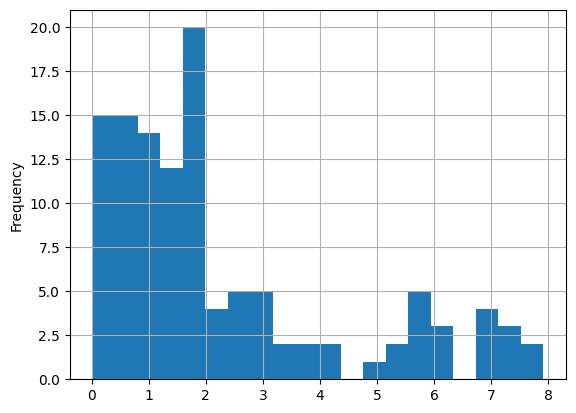

In [11]:
# Your code here.
model = LinearRegression()
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)
error = np.abs(y_test - y_prediction)
error = pd.Series(error)
error.plot.hist(bins = 20, grid = True)
plt.show()

In [ ]:
# Given code to plot. Define y_pred in the cell above from the test dataset
error = np.abs(y_test - y_pred)
error = pd.Series(error)
error.plot.hist(bins=20, grid=True)

---

The next two questions will focus on the stock dataset. This dataset records the mean stock price over a given month for different companies. The companies (and the symbols representing them) are Microsoft (MSFT), Amazon (AMZN), IBM (IBM), Google (GOOG) and Apple (AAPL).


This data is from Janurary 2000 to March 2011, including the financial crash of 2008:

In [ ]:
df = pd.read_csv("./stocks.csv")

i = df.symbol == "AAPL"
df[i].plot(x="fractional_year_after_2000", y="price", grid=True)

The next two questions will play the role of a technology investor on August 1st, 2008. You will be trying to make a quality prediction on which stocks to buy.

Apple stock looks promising because Steve Jobs announced the iPhone in Janurary 9th, 2007 and it arrived in the hands of consumers June 29th, 2007, both over a year earlier (and hence the very steep rise in late 2007).

---
**Problem 4.**
This question will investigate how well a certain model performs. This model only uses historical stock prices to predict the future stock value. Specifically, let's fit a polynomial to historical stock values. The input to the polynomial is the date (as a fractional year after 2000) and the output is Apple's stock price.

Fit a 10-degree polynomial to the train data (the features for this polynomial are given). **Does this data accurately predict Apple stock dip in early 2008?** This is before the big financial crash in late 2008. This stock dip happens in early 2008 where the stock price goes from 200 to 125 to 185 dollars in a span of several months. This dip is in the train data -- if the model can't predict this, it has no hope on future data (aka the test data).

* Yes, very accurately.
* No. However, it does predict the stock reaches it's lowest point ever recorded during the dip.
* No, it predicts a stock price that's far lower than observed. However, it predicts that it's decreasing.
* No, it predicts a stock price that's far higher than observed. However, it predicts that it's decreasing.
* No. It actually predicts the stock reaches it's highest value ever recorded during the dip.

*Hint:* plot the train data and predictions on the train data!

*Gold star questions:* Try predicting on the test data. Does this prediction make any sense? Why not? How does this change as the `degree` of the polynomial is changed?

In [13]:
df = pd.read_csv("./stocks.csv")

# Defines the test data to be all stock prices after August 1st, 2008
# The train data are all values before that
# This matches the task this model will be used for: to predict *future* stock prices
i = df.symbol == "AAPL"
apple = df[i]

idx_train = apple.fractional_year_after_2000 <= 8.6666
idx_test = ~idx_train

X_train = apple.loc[idx_train, ["fractional_year_after_2000"]]
y_train = apple.loc[idx_train, "price"]

X_test = apple.loc[idx_test, ["fractional_year_after_2000"]]
y_test = apple.loc[idx_test, "price"]

In [14]:
# This cell creates polynomial features for a polynomial of degree 10
transform = PolynomialFeatures(degree=10)

X_train_poly = transform.fit_transform(X_train)
X_test_poly = transform.fit_transform(X_test)

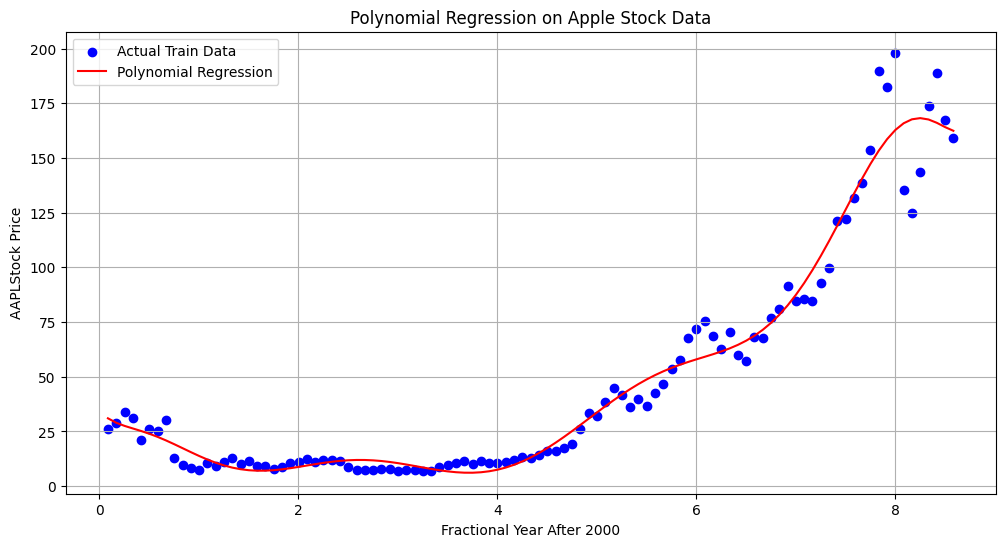

In [16]:
# Your code here.
model = LinearRegression(fit_intercept = False)
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

plt.figure(figsize = (12, 6))
plt.scatter(X_train, y_train, color = 'blue', label = 'Actual Train Data')
plt.plot(X_train, y_train_pred, color = 'red', label = 'Polynomial Regression')
plt.xlabel('Fractional Year After 2000')
plt.ylabel('AAPLStock Price')
plt.title('Polynomial Regression on Apple Stock Data')
plt.legend()
plt.grid(True)
plt.show()

---
**Problem 5.**
Now, let's instead use other companies stock prices to predict Apple's stock price. That is, let's say > `aapl = c[0]*amzn + c[1]*goog + c[2]*ibm + c[3]*msft` on any given day for an array `c` that is constant throughout time. This does not take any historical stock prices into account, which is a massive oversight (aka, this model would lose money if used to buy stocks).

**What is the smallest upper bound on absolute errors?** That is, what is the smallest value (from the options given) such that all absolute errors are smaller than that value? The error will be taken between `y_test` and the predicted value for `X_test`. The linear model should be trained on the train data, and the 2008 financial crisis (and recovery) is in the test data.

*Hint:* plot the test data and prediction!

Possible answers:

* 20
* 50
* 75
* 100
* 150
* 200

*Gold star question:* What does this say about buying stocks? How would the features be modified to include historical numbers?

In [18]:
df = pd.read_csv("./stocks.csv")

In [19]:
# Defines the test data to be all stock prices after August 1st, 2008
dataset = df.pivot_table(columns="symbol", index="fractional_year_after_2000", values="price")

# Google didn't go public until August 2004.
# The values are NaN before that. Let's fill those values.
dataset = dataset.fillna(value=0)

# Define train and test sets to be all data before/after Aug. 2008
train = dataset.index <= 8.666
test = ~train

combo_companies = ["AMZN", "GOOG", "IBM", "MSFT"]
X_train = dataset.loc[train, combo_companies]
y_train = dataset.loc[train, "AAPL"]

X_test = dataset.loc[test, combo_companies]
y_test = dataset.loc[test, "AAPL"]

In [21]:
# Your code here.
model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
abs_errors = np.abs(y_test - y_pred)
smallest_upper_bound = np.max(abs_errors)
smallest_upper_bound

42.61113870152968

Also, note that this dataset only includes the *monthly* average prices, not the prices detailed every minute or second. This is a different ball-game, especially with high-frequency trading.